In [38]:
"""
@author: Hyungjun Kim
"""

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def palplots(pals, size=1, show_text=False):
    nrows = len(pals)
    ncols = len(pals[list(pals)[0]])
    
    f, axes = plt.subplots(nrows, 1, figsize=(ncols * size * 2, size * nrows))
    for k, c in enumerate(pals):
        axes[k].imshow(np.arange(ncols).reshape(1, ncols),
                  cmap=mpl.colors.ListedColormap(list(pals[c])),
                  interpolation="nearest", aspect="auto")
        if show_text:
            for j, color in enumerate(list(pals[c])):
                axes[k].text(j * size, 0, f'({round(color[0]*255):.0f},{round(color[1]*255):.0f},{round(color[2]*255):.0f})', horizontalalignment='center', verticalalignment='center')
        axes[k].set_xticks(np.arange(ncols) - .5)
        axes[k].set_yticks([-.5, .5])
        axes[k].set_xticklabels([])
        axes[k].set_yticklabels([])
        axes[k].text(-size, 0, c, horizontalalignment='center',verticalalignment='center', fontsize=18)
        

In [45]:
n = 6 # number of colors in a palette
palette_list = ['Greys', 'Reds', 'Blues', 'Greens']
 # palette list to show
show_text = False # whether to show (R,G,B) text on each color or not
show_grayscale = False # whether to show result figure in grayscale or not

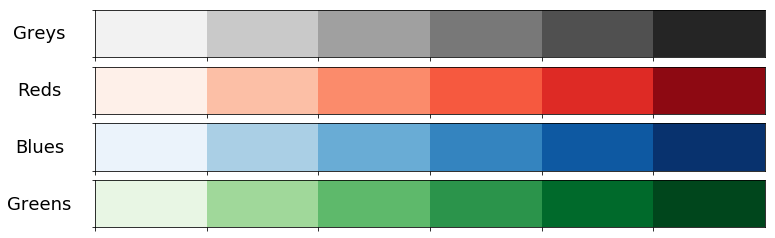

In [46]:
palette_full_list = ['Greys', 'Reds', 'Blues', 'Greens', 'Oranges', 'Purples', 'BuGn', 'BuPu', 'GnBu', 'OrRd', 'PuBu', 'PuRd', 'RdPu', 'YlGn', 'PuBuGn', 'YlGnBu', 'YlOrBr', 'YlOrRd']


for color in palette_list:
    if color not in palette_full_list:
        assert False, f"Unknown color palette: {color}"

L_list = [x/(n-1)*0.8+0.15 for x in range(n)]
L_list.reverse()

dict_pal = dict()
for pal in palette_list:
    df = pd.DataFrame(columns=['r', 'g', 'b', 'L'])
    c = sns.color_palette(pal, 100)
    dict_pal[pal] = [(0,0,0)] * n
    for i in range(len(c)):
        df = df.append({
                'r':c[i][0],
                'g':c[i][1],
                'b':c[i][2],
                'L':0.21*c[i][0]+0.72*c[i][1]+0.07*c[i][2],
                }, ignore_index=True)
    
    for k, l in enumerate(L_list):
        df_sort = df.iloc[(df['L']-l).abs().argsort()[:1]]
        ind = df_sort.index.tolist()[0]
        if show_grayscale:
            dict_pal[pal][k] = (df.iloc[ind]['L'], df.iloc[ind]['L'], df.iloc[ind]['L'])
        else:
            dict_pal[pal][k] = (df.iloc[ind]['r'], df.iloc[ind]['g'], df.iloc[ind]['b'])
    

palplots(dict_pal, 1, show_text)
